# The Race Around The Netherlands - 2019
webscraping the leaderboard of 2019

more detailed description of the code can be found in the 2018 notebook.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import regex as re
import datetime

In [2]:
#for scraping java
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import presence_of_element_located

In [3]:
#CUSTOMIZE URL
url = 'https://ratn2019.legendstracking.com/#'

#set that you want to run the chrome headless (behind the scenes, in the background)
chrome_options = Options()
chrome_options.add_argument("--headless")

#insert absolute path of chrome driver
driver = webdriver.Chrome('C:/Users/jetsa/chromedriver.exe', options = chrome_options)
driver.get(url)

# Find and click the right button, using the tab's id
button = driver.find_element(By.ID, "leaderboard-icon")
button.click()

In [4]:
#From here on you can start using BS4. I will now also see the html=code that became visible by clicking the button.
source = driver.page_source

#close the webdriver
driver.close()

<html>
 <head>
  <meta content="https://www.legendstracking.com/_lib/img/logo-facebook.png" property="og:image"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="Legends Tracking" property="og:title"/>
  <meta content="https://www.legendstracking.com" property="og:url"/>
  <meta content="Live gps tracking services for your event" property="og:description"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <link href="../css/font-awesome.min.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol.css" rel="stylesheet" type="text/css"/>
  <link href="../css/trackers1.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol3-sidebar.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol3-layerswitcher.css" rel="stylesheet" type="text/css"/>
  <link href="../css/flags.css" rel="stylesheet" type="text/css"/>
  <link href="../dev/css/j
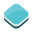

In [5]:
#make the soup
soup = BeautifulSoup(source, 'html')
print(soup.prettify())

In [21]:
#MIGHT NEED CUSTOMIZATION, check if you find the right table when you choose table 2.
#The table should contain information about the timings of the soloriders.
#this only works when put in a different cell.Maybe because you'll have to wait till the previous line is loaded?
table_solo = soup.find_all('table')[2]
table_solo

<table><tbody><tr><td colspan="6"></td><td>Start</td><td>Timing 1</td><td>Timing 2</td><td>Timing 3</td><td>Timing 4</td><td>Timing 5</td><td>Timing 6</td><td>Timing 7</td><td>Timing 8</td><td>Timing 9</td><td>Finish</td></tr><tr><td>1)</td><td style="vertical-align:top">26</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-gb" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars fa-fw"></i></td><td>Robison</td><td>Kevin</td><td><b>Wed 8:00</b></td><td><span id="leaderboard_17478_1"><b>Wed 13:50</b></span></td><td><span id="leaderboard_17478_2"><b>Thu 11:19</b></span></td><td><span id="leaderboard_17478_3"><b>Thu 14:57</b></span></td><td><span id="leaderboard_17478_4"><b>Thu 21:03</b></span></td><td><span id="leaderboard_17478_5"><b>Fri 18:02</b></span></td><td><span id="leaderboard_17478_6"><b>Sat 17:52</b></span></td><td><span id="leaderboard_17478_7"><b>Sun 5:50</b></span></td><td><span id="lead

In [20]:
#find all the rows from this specific table
rows_solo = table_solo.findChildren('tr')
rows_solo[25]

<tr><td style="vertical-align:top"><span class="iconNotVisible" id="participantListIcon1_17482"><a class="participantDetailsListLinks" href="#" onclick="participantSetMarker(17482)" title="Show participant tracker"><i aria-hidden="true" class="fa fa-eye-slash fa-fw" style="color:grey;"></i></a></span><span class="iconVisible" id="participantListIcon2_17482"><a class="participantDetailsListLinks" href="#" onclick="participantClearMarker(17482)" title="Hide participant tracker"><i aria-hidden="true" class="fa fa-eye fa-fw"></i></a></span></td><td style="vertical-align:top"><span class="iconVisible" id="participantListIcon3_17482"><a class="participantDetailsListLinks" href="#" onclick="participantSetTrack(17482,10459)" title="Show participant course"><i aria-hidden="true" class="fa fa-map-o fa-fw" style="color:grey;"></i></a></span><span class="iconNotVisible" id="participantListIcon4_17482"><a class="participantDetailsListLinks" href="#" onclick="participantClearTrack(17482,10459)" titl

In [10]:
#find all the rows from this specific table
rows_solo = table_solo.findChildren('tr')

#convert each elements into a string to prevent an even more horrible mess
string_rows = []

for i in rows_solo:
    i = str(i)
    string_rows.append(i)
# print(string_rows[7]) #test

#convert the string+rows into a dataframe. Name the column "riders"
solo_riders = pd.DataFrame(string_rows)
solo_riders.columns=["riders"]
solo_riders.head()

#split the strings on </td> (this is removed)
solo_riders = solo_riders["riders"].str.split("</td>", expand = True)
solo_riders.head() #to check which columns you should delete in the next step

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"<tr><td colspan=""6"">",<td>Start,<td>Timing 1,<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top"">26","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Robison,<td>Kevin,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17478_1""><b>Wed 13:5...","<td><span id=""leaderboard_17478_2""><b>Thu 11:1...","<td><span id=""leaderboard_17478_3""><b>Thu 14:5...","<td><span id=""leaderboard_17478_4""><b>Thu 21:0...","<td><span id=""leaderboard_17478_5""><b>Fri 18:0...","<td><span id=""leaderboard_17478_6""><b>Sat 17:5...","<td><span id=""leaderboard_17478_7""><b>Sun 5:50...","<td><span id=""leaderboard_17478_8""><b>Sun 21:5...","<td><span id=""leaderboard_17478_9""><b>Mon 18:4...","<td><span id=""leaderboard_17478_10""><b>Tue 15:...",</tr>
2,<tr><td>2),"<td style=""vertical-align:top"">18","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Robison,<td>Jamie,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17477_1""><b>Wed 13:5...","<td><span id=""leaderboard_17477_2""><b>Thu 11:1...","<td><span id=""leaderboard_17477_3""><b>Thu 14:5...","<td><span id=""leaderboard_17477_4""><b>Thu 21:0...","<td><span id=""leaderboard_17477_5""><b>Fri 18:0...","<td><span id=""leaderboard_17477_6""><b>Sat 17:5...","<td><span id=""leaderboard_17477_7""><b>Sun 5:51...","<td><span id=""leaderboard_17477_8""><b>Sun 22:0...","<td><span id=""leaderboard_17477_9""><b>Mon 18:4...","<td><span id=""leaderboard_17477_10""><b>Tue 15:...",</tr>
3,<tr><td>3),"<td style=""vertical-align:top"">16","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Crawford,<td>Christopher,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17475_1""></span>","<td><span id=""leaderboard_17475_2""><b>Thu 15:3...","<td><span id=""leaderboard_17475_3""><b>Thu 20:3...","<td><span id=""leaderboard_17475_4""><b>Fri 10:2...","<td><span id=""leaderboard_17475_5""></span>","<td><span id=""leaderboard_17475_6""><b>Sat 12:5...","<td><span id=""leaderboard_17475_7""><b>Sat 18:2...","<td><span id=""leaderboard_17475_8""><b>Sun 21:3...","<td><span id=""leaderboard_17475_9""><b>Mon 17:3...","<td><span id=""leaderboard_17475_10""><b>Tue 15:...",</tr>
4,<tr><td>4),"<td style=""vertical-align:top"">133","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Gebing,<td>Pascal,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17494_1""><b>Wed 15:3...","<td><span id=""leaderboard_17494_2""><b>Thu 15:4...","<td><span id=""leaderboard_17494_3""><b>Thu 19:4...","<td><span id=""leaderboard_17494_4""><b>Fri 10:4...","<td><span id=""leaderboard_17494_5""></span>","<td><span id=""leaderboard_17494_6""><b>Sat 12:5...","<td><span id=""leaderboard_17494_7""><b>Sat 18:1...","<td><span id=""leaderboard_17494_8""><b>Sun 21:3...","<td><span id=""leaderboard_17494_9""><b>Mon 17:2...","<td><span id=""leaderboard_17494_10""><b>Tue 15:...",</tr>


In [11]:
# MIGHT NEED CUSTOMIZATION - inspect the head and decide which columns to drop. In this (2019) case: colnr 1; 2; 17
solo_riders.drop(solo_riders.columns[[1,2,17]], axis=1, inplace = True)

#rename columns
solo_riders.columns=["Place", "MarsVenus","Lastname", "Firstname", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]

#check which rows are empty/useless and you should drop in the next cell. You'll need to see all rows (display.max_rows).
# In this case the rows you want to delete are nr 0; 45, 84
pd.set_option('display.max_rows', solo_riders.shape[0]+1)
solo_riders

,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,"<tr><td colspan=""6"">",<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Robison,<td>Kevin,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17478_1""><b>Wed 13:5...","<td><span id=""leaderboard_17478_2""><b>Thu 11:1...","<td><span id=""leaderboard_17478_3""><b>Thu 14:5...","<td><span id=""leaderboard_17478_4""><b>Thu 21:0...","<td><span id=""leaderboard_17478_5""><b>Fri 18:0...","<td><span id=""leaderboard_17478_6""><b>Sat 17:5...","<td><span id=""leaderboard_17478_7""><b>Sun 5:50...","<td><span id=""leaderboard_17478_8""><b>Sun 21:5...","<td><span id=""leaderboard_17478_9""><b>Mon 18:4...","<td><span id=""leaderboard_17478_10""><b>Tue 15:..."
2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Robison,<td>Jamie,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17477_1""><b>Wed 13:5...","<td><span id=""leaderboard_17477_2""><b>Thu 11:1...","<td><span id=""leaderboard_17477_3""><b>Thu 14:5...","<td><span id=""leaderboard_17477_4""><b>Thu 21:0...","<td><span id=""leaderboard_17477_5""><b>Fri 18:0...","<td><span id=""leaderboard_17477_6""><b>Sat 17:5...","<td><span id=""leaderboard_17477_7""><b>Sun 5:51...","<td><span id=""leaderboard_17477_8""><b>Sun 22:0...","<td><span id=""leaderboard_17477_9""><b>Mon 18:4...","<td><span id=""leaderboard_17477_10""><b>Tue 15:..."
3,<tr><td>3),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Crawford,<td>Christopher,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17475_1""></span>","<td><span id=""leaderboard_17475_2""><b>Thu 15:3...","<td><span id=""leaderboard_17475_3""><b>Thu 20:3...","<td><span id=""leaderboard_17475_4""><b>Fri 10:2...","<td><span id=""leaderboard_17475_5""></span>","<td><span id=""leaderboard_17475_6""><b>Sat 12:5...","<td><span id=""leaderboard_17475_7""><b>Sat 18:2...","<td><span id=""leaderboard_17475_8""><b>Sun 21:3...","<td><span id=""leaderboard_17475_9""><b>Mon 17:3...","<td><span id=""leaderboard_17475_10""><b>Tue 15:..."
4,<tr><td>4),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Gebing,<td>Pascal,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17494_1""><b>Wed 15:3...","<td><span id=""leaderboard_17494_2""><b>Thu 15:4...","<td><span id=""leaderboard_17494_3""><b>Thu 19:4...","<td><span id=""leaderboard_17494_4""><b>Fri 10:4...","<td><span id=""leaderboard_17494_5""></span>","<td><span id=""leaderboard_17494_6""><b>Sat 12:5...","<td><span id=""leaderboard_17494_7""><b>Sat 18:1...","<td><span id=""leaderboard_17494_8""><b>Sun 21:3...","<td><span id=""leaderboard_17494_9""><b>Mon 17:2...","<td><span id=""leaderboard_17494_10""><b>Tue 15:..."
5,<tr><td>5),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Rutten,<td>René,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17484_1""><b>Wed 14:3...","<td><span id=""leaderboard_17484_2""><b>Thu 13:1...","<td><span id=""leaderboard_17484_3""><b>Thu 16:5...","<td><span id=""leaderboard_17484_4""><b>Fri 8:01...","<td><span id=""leaderboard_17484_5""><b>Fri 20:1...","<td><span id=""leaderboard_17484_6""><b>Sat 19:0...","<td><span id=""leaderboard_17484_7""><b>Sun 9:53...","<td><span id=""leaderboard_17484_8""><b>Mon 9:44...","<td><span id=""leaderboard_17484_9""><b>Tue 7:57...","<td><span id=""leaderboard_17484_10""><b>Tue 20:..."
6,<tr><td>6),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Clark,<td>Gawaine,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17414_1""><b>Wed 15:1...","<td><span id=""leaderboard_17414_2""><b>Thu 13:2...","<td><span id=""leaderboard_17414_3""><b>Thu 17:4...","<td><span id=""leaderboard_17414_4""><b>Fri 9:17...","<td><span id=""leaderboard_17414_5""><b>Sat 9:43...","<td><span id=""leaderboard_17414_6""><b>Sun 9:53...","<td><span id=""leaderboard_17414_7""

In [ ]:
#CUSTOMIZE: drop useless ROWS
solo_riders = solo_riders.drop([0, 45, 84]).reset_index()
solo_riders.head()

In [ ]:
#extract the gender
gender = []

for row in solo_riders["MarsVenus"]:
    if 'mars' in row:
        gender.append('male')
    if 'venus' in row:
        gender.append('female')

# Add gender as a column to the solo_riders dataframe and drop the MarsVenus column and the automatically created index-column
solo_riders["Gender"] = gender        
solo_riders = solo_riders.drop(solo_riders[["MarsVenus", "index"]], axis = 1)
solo_riders.head()

In [ ]:
#CUSTOMIZE append columns with start date&time, and wether it's a solo or duo ride.
StartDate = datetime.datetime(2019, 5, 1, 8)
solo_riders.insert(0, 'Solo or Duo', 'Solo')
solo_riders.insert(0, 'StartDate', StartDate)

solo_riders.head()

### Prepare the duo-table 2019

In [ ]:
#grab the duo table
table_duo = soup.find_all('table')[3]
table_duo

In [ ]:
#grab the rows
rows_duo = table_duo.findChildren('tr')

#convert each elements into a string to prevent an even more horrible mess
string_rows = []

for i in rows_duo:
    i = str(i)
    string_rows.append(i)
print(string_rows[3])

In [ ]:
#convert the string+rows into a dataframe. Name the column "riders"
duo_riders = pd.DataFrame(string_rows)
duo_riders.columns=["riders"]
duo_riders.head()

#split the strings on </td>
duo_riders = duo_riders["riders"].str.split("</td>", expand = True)
duo_riders

In [ ]:
# CUSTOMIZE drop useless columns: colnr 1; 2; 17
duo_riders = duo_riders.drop(duo_riders.columns[[1,2,17]], axis=1)
duo_riders

#rename columns
duo_riders.columns=["Place", "MarsVenus","Lastname", "Firstname", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]

#check which rows are empty/useless and you should drop in the next cell. 
duo_riders

In [ ]:
#CUSTOMIZE: drop useless ROWS
duo_riders = duo_riders.drop([0, 20, 28]).reset_index()
duo_riders.head()

In [ ]:
#extract the gender 
# NOTE: 2019 IS DIFFERENT FROM OTHER YEARS, IT DOES NOT MAKE CLEAR WHICH RIDERS RIDE TOGETHER. NEITHER IS THERE AN COUPLE-ICON
gender = []

for row in duo_riders["MarsVenus"]:
    if 'mars' in row:
        gender.append('male')
    if 'venus' in row:
        gender.append('female')
    
#Add gender as a column to the solo_riders dataframe and drop the MarsVenus column and the automatically created index-column
duo_riders["Gender"] = gender
duo_riders = duo_riders.drop(duo_riders[["MarsVenus", "index"]], axis = 1)
duo_riders

In [ ]:
# there is a weird occurence in the data of Neil Crawford 
# he passed no checkpoint other than the first one, but is said to have come in in 19th place.
#based on this, he will later on get the status 'finisher'. It should be DNF. I remove his 'place' here

duo_riders['Place'] = duo_riders['Place'].str.replace('<tr><td>19\)', '')
duo_riders

In [ ]:
#CUSTOMIZE append columns with the startdate (line 1) and whether it a duo or solo ride (line 2)
StartDate = datetime.datetime(2019, 5, 1, 8)
duo_riders.insert(0, 'Solo or Duo', 'Duo')
duo_riders.insert(0, 'StartDate', StartDate)
duo_riders.head()

In [ ]:
# glue solo and duo-riders together
all_riders = pd.concat([solo_riders, duo_riders]).reset_index()
all_riders = all_riders.drop(all_riders.columns[0], axis=1)
pd.set_option('display.max_rows', all_riders.shape[0]+1)
all_riders

In [ ]:
#set of patterns you want to delete from the columns:
del_patterns = ['<td>', '\)', '<b>', '</b>', '<span id="leaderboard_[\d][\d][\d][\d][\d]*_[\d][\d]*">', '</span>', '<tr>', '</tr>', None]

In [ ]:
all_riders = all_riders.replace(to_replace = del_patterns, value = '', regex = True)
all_riders.head()

In [ ]:
# add a column that tells you if the rider: finished on time (finisher); did not start (DNS) or did not finish (DNF)
# There are now white spaces when no place is assigned (DNS or DNF), and this overcomplicates stuff. Remove the white spaces.
all_riders['Place'] = all_riders['Place'].str.strip()

# create a list of the three conditions
conditions = [
    (all_riders["Place"] != ''), #finisher
    (all_riders["Place"] == '') & (all_riders['StartTiming'] != ''), #DNF
    (all_riders["Place"] == '') & (all_riders['StartTiming'] == '') #DNS
    ]

# create a list of the values we want to assign for each condition
values = ["Finisher", "DNF", "DNS"]

# create a new column and use np.select to assign values to it using our lists as arguments
all_riders['Status'] = np.select(conditions, values)

# display updated DataFrame
all_riders.head()

In [ ]:
# for prettiness sake, change the order of the columns a bit (place, first name, last name, gender, all timings)
all_riders = all_riders[["Place", "Firstname", "Lastname", "Gender", "Solo or Duo" , "StartDate", "Status", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]]
all_riders

In [ ]:
#CUSTOMIZE write to csv use the year in the name!
all_riders.to_csv('all_riders_2019.csv')